# USED CAR PRICE PREDICTION

With the covid 19 impact in the market, we have seen lot of changes in the car market. Now some 
cars are in demand hence making them costly and some are not in demand hence cheaper. One 
of our clients works with small traders, who sell used cars. With the change in market due to covid 
19 impact, our client is facing problems with their previous car price valuation machine learning 
models. So, they are looking for new machine learning models from new data. We have to make 
car price valuation model. This project contains two phase


### Target:
    To predict the Prices of used cars

In [1]:
#Importing Libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error

from sklearn.model_selection import cross_val_score

import warnings
warnings.filterwarnings('ignore')

In [2]:
#Extract datasets from csv file

data = pd.read_excel(r'C:\Users\91977\Documents\Python Scripts\PROJECTS_FLIPROBO\Used_CarDetails.xlsx')

In [3]:
data  #display the datset

,Unnamed: 0,Unnamed: 0.1,Model,Make_Year,Driven_Kilometers,Fuel,Transmission,Owner(s),Mileage,Engine,Price,Location
0,12,12,Maruti Wagon R,2017,41174,Petrol,Automatic,1,20.51,998,430000,Ahmedabad
1,14,14,Hyundai Verna CRDi . AT SX Plus,2017,70000,Diesel,Automatic,1,22.00,1582,894999,Ahmedabad
2,58,58,Audi A TDI Premium Plus,2018,14667,Diesel,Automatic,1,18.25,1968,3200000,Ahmedabad
3,62,62,Honda City i VTEC CVT VX,2016,55000,Petrol,Automatic,1,18.00,1497,877999,Ahmedabad
4,63,63,Mercedes-Benz E-Class Exclusive E d BSIV,2019,30486,Diesel,Automatic,1,16.10,1950,4800000,Ahmedabad
...,...,...,...,...,...,...,...,...,...,...,...,...
6219,6411,6449,Ford EcoSport . Diesel Titanium BSIV,2019,30000,Diesel,Manual,1,23.00,1498,990000,Pune
6220,6412,6450,Maruti Wagon R VXI Plus,2017,40000,Petrol,Manual,1,20.51,998,450000,Pune
6221,6419,6457,Toyota Yaris G BSIV,2018,23643,Petrol,Manual,1,17.10,1496,1000000,Pune
6222,6422,6460,Hyundai Verna . VTVT,2012,69000,Petrol,Manual,1,17.43,1396,465000,Pune


In [4]:
data.columns  #list the column names in our dataset

Index(['Unnamed: 0', 'Unnamed: 0.1', 'Model', 'Make_Year', 'Driven_Kilometers',
       'Fuel', 'Transmission', 'Owner(s)', 'Mileage', 'Engine', 'Price',
       'Location'],
      dtype='object')

In [5]:
#It contains numbers index that doesn't affect our car price, hence removing this column
data = data.drop('Unnamed: 0',axis=1) 
data = data.drop('Unnamed: 0.1',axis=1) 

In [6]:
data #display the dataset

,Model,Make_Year,Driven_Kilometers,Fuel,Transmission,Owner(s),Mileage,Engine,Price,Location
0,Maruti Wagon R,2017,41174,Petrol,Automatic,1,20.51,998,430000,Ahmedabad
1,Hyundai Verna CRDi . AT SX Plus,2017,70000,Diesel,Automatic,1,22.00,1582,894999,Ahmedabad
2,Audi A TDI Premium Plus,2018,14667,Diesel,Automatic,1,18.25,1968,3200000,Ahmedabad
3,Honda City i VTEC CVT VX,2016,55000,Petrol,Automatic,1,18.00,1497,877999,Ahmedabad
4,Mercedes-Benz E-Class Exclusive E d BSIV,2019,30486,Diesel,Automatic,1,16.10,1950,4800000,Ahmedabad
...,...,...,...,...,...,...,...,...,...,...
6219,Ford EcoSport . Diesel Titanium BSIV,2019,30000,Diesel,Manual,1,23.00,1498,990000,Pune
6220,Maruti Wagon R VXI Plus,2017,40000,Petrol,Manual,1,20.51,998,450000,Pune
6221,Toyota Yaris G BSIV,2018,23643,Petrol,Manual,1,17.10,1496,1000000,Pune
6222,Hyundai Verna . VTVT,2012,69000,Petrol,Manual,1,17.43,1396,465000,Pune


In [7]:
data.shape  #Let's check the dataset dimension

(6224, 10)

## Our dataset "6224" Cars(rows) and 10 columns

In [8]:
data.info()  #information about the data


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6224 entries, 0 to 6223
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Model              6224 non-null   object 
 1   Make_Year          6224 non-null   int64  
 2   Driven_Kilometers  6224 non-null   int64  
 3   Fuel               6224 non-null   object 
 4   Transmission       6224 non-null   object 
 5   Owner(s)           6224 non-null   int64  
 6   Mileage            6224 non-null   float64
 7   Engine             6224 non-null   int64  
 8   Price              6224 non-null   int64  
 9   Location           6224 non-null   object 
dtypes: float64(1), int64(5), object(4)
memory usage: 486.4+ KB


### The features are of "Object DataType" and "numerical DataType",  the Target column contains "numerical DataType"

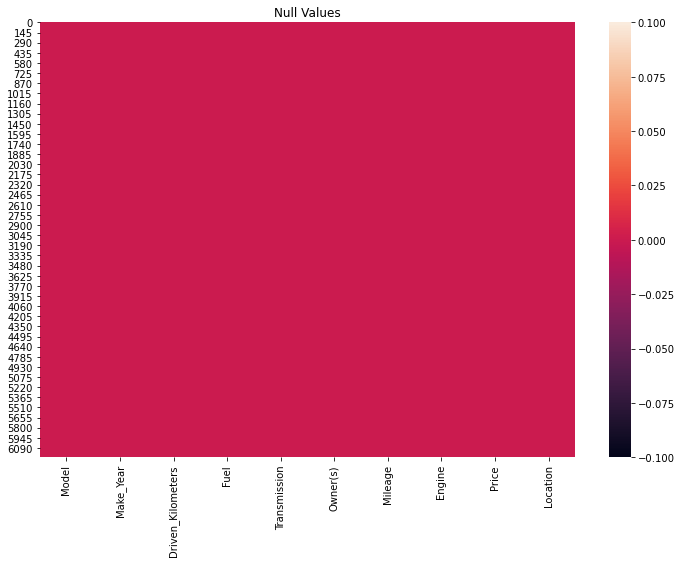

In [9]:
#Let's visualize to check the nullvalues in our dataset

plt.figure(figsize = [12,8])
sns.heatmap(data.isnull())
plt.title('Null Values')
plt.show()

## Observation:
We can clearly see that there is no null values in our dataset

In [10]:
#lets check our column data types

data.dtypes

Model                 object
Make_Year              int64
Driven_Kilometers      int64
Fuel                  object
Transmission          object
Owner(s)               int64
Mileage              float64
Engine                 int64
Price                  int64
Location              object
dtype: object

In [11]:
#Let's check the overall metrics of each column


data.describe()

,Make_Year,Driven_Kilometers,Owner(s),Mileage,Engine,Price
count,6224.000000,6224.000000,6224.000000,6224.000000,6224.000000,6.224000e+03
mean,2014.862789,58242.295148,1.214653,19.957942,1405.529724,7.030040e+05
std,3.056772,37702.893801,0.467354,3.872215,467.313843,7.639553e+05
min,2000.000000,500.000000,1.000000,7.500000,624.000000,4.500000e+04
25%,2013.000000,32119.250000,1.000000,17.400000,1197.000000,3.550000e+05
50%,2015.000000,55000.000000,1.000000,20.140000,1248.000000,5.000000e+05
75%,2017.000000,77072.250000,1.000000,22.540000,1498.000000,7.000000e+05
max,2021.000000,886253.000000,4.000000,36.000000,5000.000000,9.100000e+06


- 'Driven_Kilometers' and 'Engine', We see that there is disturbancy comparatively in our Mean and Median and "mean v/s std"
- Hence, we would need to check for the outliers and remove them

# EDA(Exploratory Data Analysis)
Let us explore our data and visualize it

### Univariate Analysis

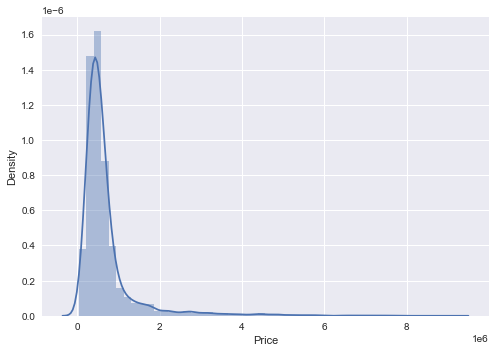

In [14]:
#Let's check the Target column : "Price"

plt.style.use('seaborn')
sns.distplot(data['Price'])
plt.show()

- Price column is not normally distributed
- we have some of the car prices with a high price than normal

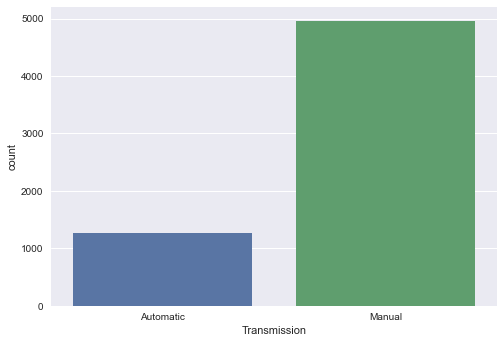

In [239]:
sns.countplot(x = 'Transmission', data = data)
plt.show()

<AxesSubplot:xlabel='Fuel', ylabel='count'>

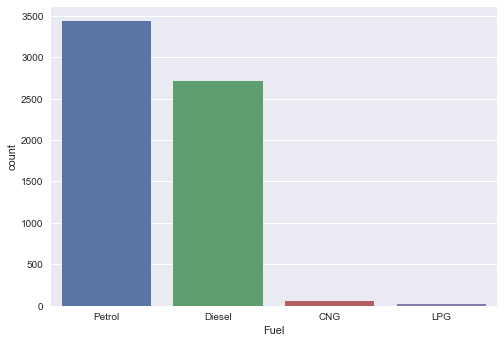

In [242]:
sns.countplot(x = 'Fuel', data = data)


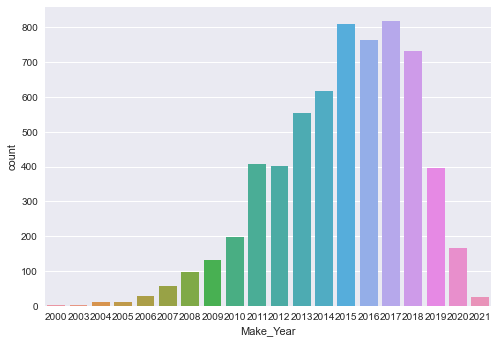

In [232]:
sns.countplot(x = 'Make_Year', data = data)
plt.show()

#### Bivariate Analysis

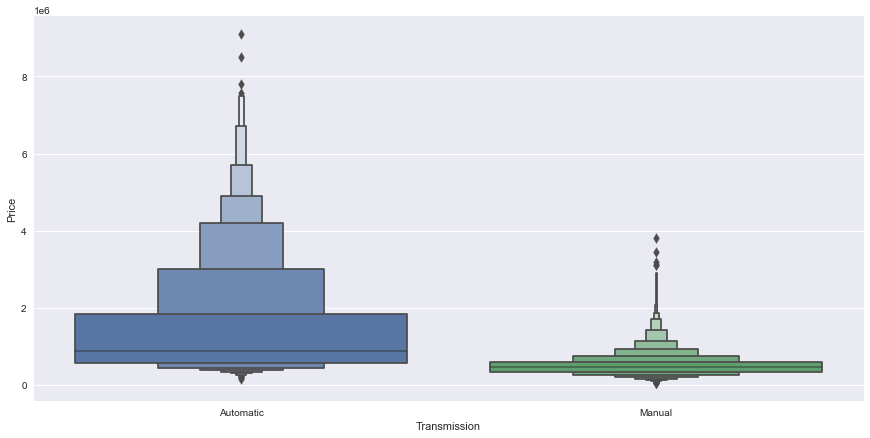

In [234]:
# Relation between Airline and Flight Price

sns.catplot(y = 'Price', x = 'Transmission',data= data.sort_values("Price", ascending = False), 
            kind = "boxen", height = 6, aspect = 2)

plt.tight_layout
plt.show()

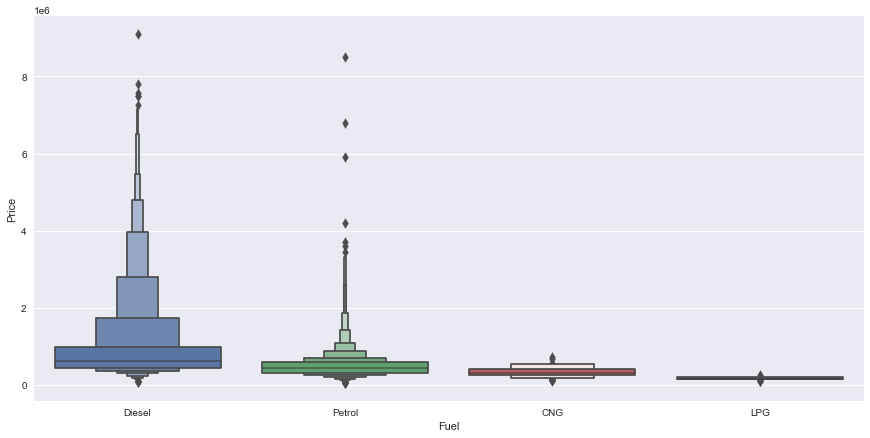

In [18]:
# Relation between Airline and Flight Price

sns.catplot(y = 'Price', x = 'Fuel',data= data.sort_values("Price", ascending = False), 
            kind = "boxen", height = 6, aspect = 2)

plt.tight_layout
plt.show()

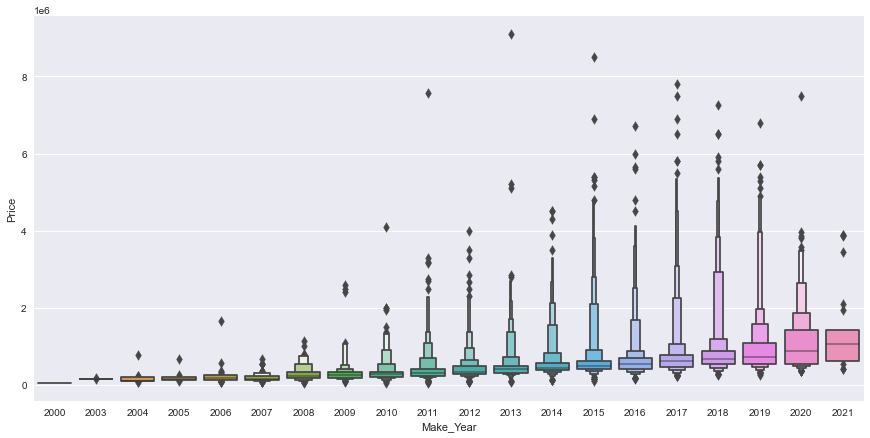

In [231]:
# Relation between Airline and Flight Price

sns.catplot(y = 'Price', x = 'Make_Year',data= data.sort_values("Price", ascending = False), 
            kind = "boxen", height = 6, aspect = 2)

plt.tight_layout
plt.show()

### Multivariate Analysis

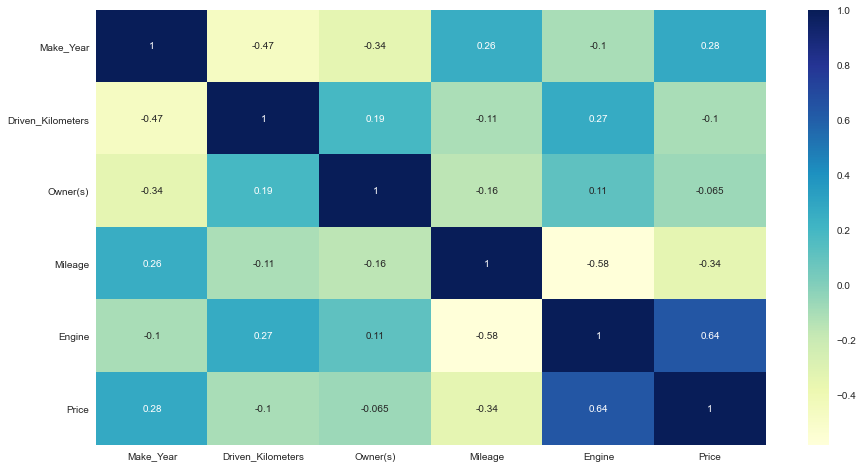

In [19]:
#Let's check the correlation by using the Heatmap (in order to check teh relation between features)

plt.figure(figsize=(15,8))
sns.heatmap(data.corr(),cmap='YlGnBu',annot = True)
plt.show()

In [246]:
data.corr()

,Make_Year,Driven_Kilometers,Owner(s),Mileage,Engine,Price
Make_Year,1.00000000,-0.46751572,-0.33809225,0.25822021,-0.10281409,0.27804739
Driven_Kilometers,-0.46751572,1.00000000,0.19364754,-0.10668879,0.26871062,-0.10012936
Owner(s),-0.33809225,0.19364754,1.00000000,-0.15976243,0.11034169,-0.06469692
Mileage,0.25822021,-0.10668879,-0.15976243,1.00000000,-0.58217861,-0.33521777
Engine,-0.10281409,0.26871062,0.11034169,-0.58217861,1.00000000,0.63812188
Price,0.27804739,-0.10012936,-0.06469692,-0.33521777,0.63812188,1.00000000


We see,
- the largest correlated features are "Engine" and "Price" with correlated values: "0.64"
- the lowest correlated features are "Owner(s)" and "Price" with correlated values: "-0.065"

## Data PreProcessing


let's check for the outliers and remove the skewness

<Figure size 576x396 with 0 Axes>

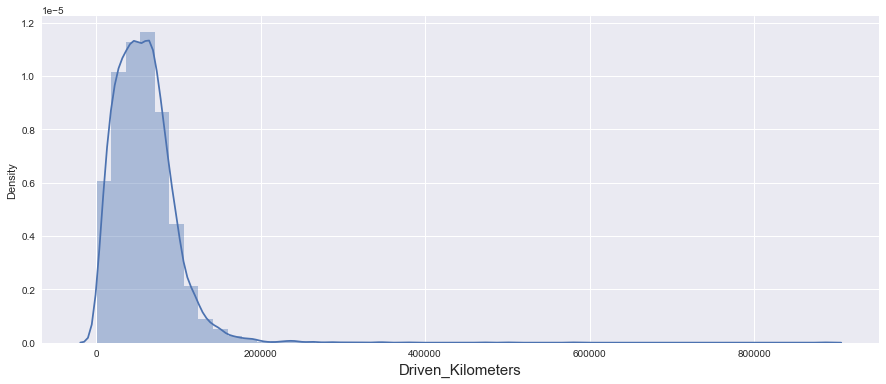

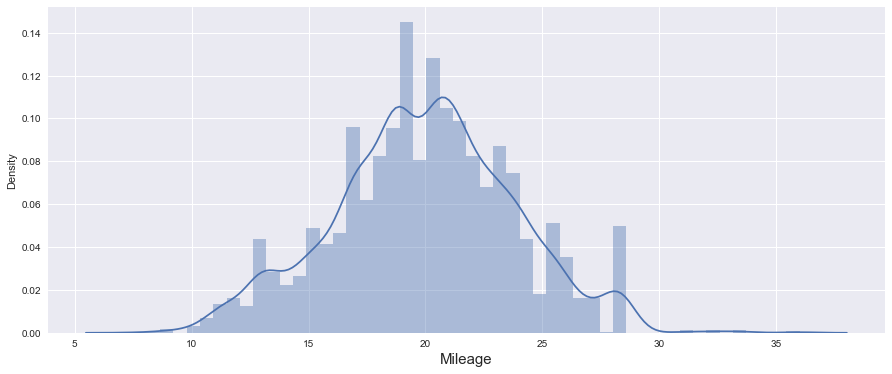

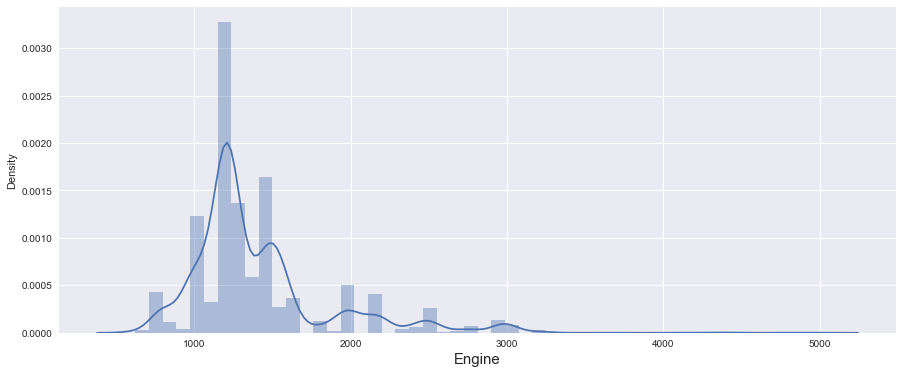

In [21]:
#Normal Distribution plotting

columns = ['Driven_Kilometers', 'Mileage', 'Engine'] #with numerical data

plt.tight_layout()
for i in columns:
    plt.figure(figsize=[15,6])
    sns.distplot(data[i])
    plt.xlabel(i,fontsize=15)
plt.show()


<Figure size 576x396 with 0 Axes>

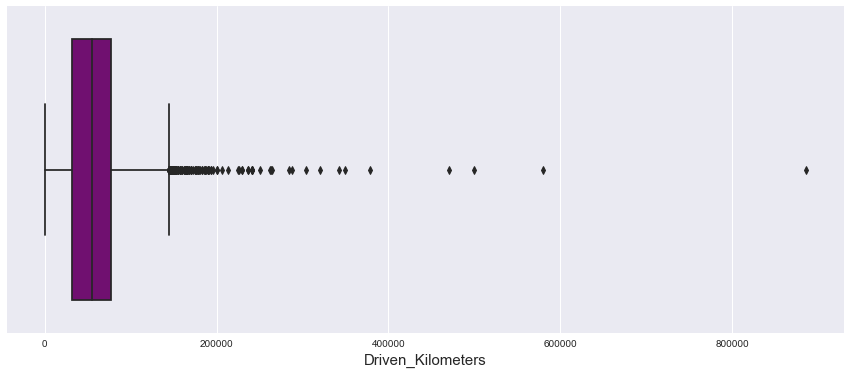

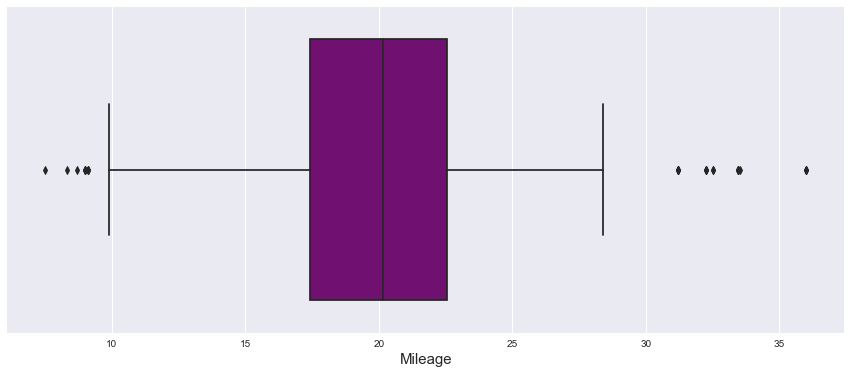

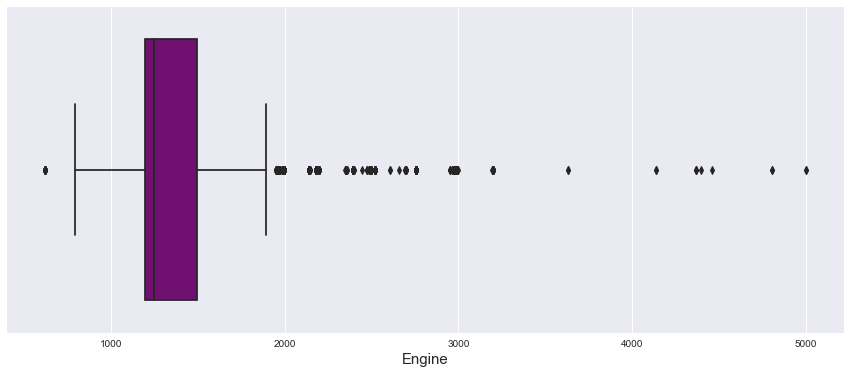

In [22]:
# Using Boxplot to checkthe outliers

columns = ['Driven_Kilometers', 'Mileage', 'Engine']

plt.tight_layout()
for i in columns:
    plt.figure(figsize=[15,6])
    sns.boxplot(data[i],color = 'Purple')
    plt.xlabel(i,fontsize=15)
plt.show()


In [23]:
features = ['Driven_Kilometers', 'Mileage', 'Engine']  #columns with outliers by checking the above plots

    Let's remove these outliers

#### Applying IQR Method


In [24]:
Q1 = data[features].quantile(0.25)
Q3 = data[features].quantile(0.75)
IQR = Q3-Q1

data_new1 = data[~((data[features] < (Q1-1.5*IQR)) | (data[features]> (Q3 + 1.5*Q3))).any(axis = 1)]

In [25]:
print('Shape - Before and After:\n')
print('Shape Before'.ljust(20),":",data.shape)
print('Shape After'.ljust(20),":",data_new1.shape)
print('Percentage Loss'.ljust(20),":",((data.shape[0]-data_new1.shape[0])/data.shape[0])*100)

Shape - Before and After:

Shape Before         : (6224, 10)
Shape After          : (6160, 10)
Percentage Loss      : 1.0282776349614395


#### Applying z-score Method

In [26]:
from scipy.stats import zscore  #importing zscore from library

z=np.abs(zscore(data[features]))
threshold = 3
data_new2 = data[(z<3).all(axis=1)]

In [27]:
print('Shape - Before and After:\n')
print('Shape Before'.ljust(20),":",data.shape)
print('Shape After'.ljust(20),":",data_new2.shape)
print('Percentage Loss'.ljust(20),":",((data.shape[0]-data_new2.shape[0])/data.shape[0])*100)

Shape - Before and After:

Shape Before         : (6224, 10)
Shape After          : (6017, 10)
Percentage Loss      : 3.3258354755784065


#### Observation:
(IQR Method)Percentage Loss      : 1.0282776349614395 %

(z-score Method) Percentage Loss      : 3.3258354755784065 %    
    
###### Percentage of data loss is less after applying IQR technique. So, let's proceed with IQR method

In [28]:
data_new = data_new1.copy()  #let's copy our new data in another variaible


## Skewness

Let's check for the skewness in our dataset

In [29]:
#Skewness before applying the outliers technique

data.skew()

Make_Year           -0.611178
Driven_Kilometers    3.696483
Owner(s)             2.253673
Mileage              0.003963
Engine               2.017822
Price                4.320026
dtype: float64

In [30]:
#Skewness after applying the outliers technique

data_new.skew()

Make_Year           -0.611907
Driven_Kilometers    0.701490
Owner(s)             2.244314
Mileage              0.012334
Engine               1.738002
Price                4.160594
dtype: float64

Skewness is more in the columns:

    "Driven_Kilometers" and "Engine"
    
- "Make_Year" and "Owner(s)" are ordinal data so skewness are ignored
- "Price" target variable so skewness is ignored

In [34]:
data_new['Driven_Kilometers'] = np.sqrt(data_new['Driven_Kilometers'])

data_new['Engine'] = np.log(data_new['Engine'])
data_new['Engine'] = np.cbrt(data_new['Engine'])
data_new['Engine'] = np.sqrt(data_new['Engine'])

In [35]:
data_new.skew()

Make_Year           -0.611907
Driven_Kilometers   -0.130465
Owner(s)             2.244314
Mileage              0.012334
Engine               0.746089
Price                4.160594
dtype: float64

##### We have removed the maximum skewness from our dataset

In [125]:
# Create a dataframe that will contain the Brands (by extracting the name from the title of the model column)

df1 = {}
df1 = pd.DataFrame(data_new['Model'].str.split().tolist(), columns="Brand Models A B C D E F G H".split())
df1 = df1.drop(columns=['Models','A','B','C','D','E','F','G','H'],axis=1)


df1['Index'] = range(6160) $creating an index column


df1.set_index('Index',inplace=True)#ssigning the index column
df1

,Brand
Index,
0,Maruti
1,Hyundai
2,Audi
3,Honda
4,Mercedes-Benz
...,...
6155,Ford
6156,Maruti
6157,Toyota


In [126]:
data_new['Index'] = range(6160)


data_new.set_index('Index',inplace=True) #assigning the index
data_new

,Model,Make_Year,Driven_Kilometers,Fuel,Transmission,Owner(s),Mileage,Engine,Price,Location
Index,,,,,,,,,,
0,Maruti Wagon R,2017,202.91377479,Petrol,Automatic,1,20.51000000,1.37996639,430000,Ahmedabad
1,Hyundai Verna CRDi . AT SX Plus,2017,264.57513111,Diesel,Automatic,1,22.00000000,1.39489974,894999,Ahmedabad
2,Audi A TDI Premium Plus,2018,121.10739036,Diesel,Automatic,1,18.25000000,1.40170654,3200000,Ahmedabad
3,Honda City i VTEC CVT VX,2016,234.52078799,Petrol,Automatic,1,18.00000000,1.39315133,877999,Ahmedabad
4,Mercedes-Benz E-Class Exclusive E d BSIV,2019,174.60240548,Diesel,Automatic,1,16.10000000,1.40142338,4800000,Ahmedabad
...,...,...,...,...,...,...,...,...,...,...
6155,Ford EcoSport . Diesel Titanium BSIV,2019,173.20508076,Diesel,Manual,1,23.00000000,1.39317253,990000,Pune
6156,Maruti Wagon R VXI Plus,2017,200.00000000,Petrol,Manual,1,20.51000000,1.37996639,450000,Pune
6157,Toyota Yaris G BSIV,2018,153.76280434,Petrol,Manual,1,17.10000000,1.39313010,1000000,Pune


In [127]:
Used_Cars = pd.concat([data_new, df1], axis=1) #Combine both the datasets

In [128]:
Used_Cars  #Display the extracted dataset

,Model,Make_Year,Driven_Kilometers,Fuel,Transmission,Owner(s),Mileage,Engine,Price,Location,Brand
Index,,,,,,,,,,,
0,Maruti Wagon R,2017,202.91377479,Petrol,Automatic,1,20.51000000,1.37996639,430000,Ahmedabad,Maruti
1,Hyundai Verna CRDi . AT SX Plus,2017,264.57513111,Diesel,Automatic,1,22.00000000,1.39489974,894999,Ahmedabad,Hyundai
2,Audi A TDI Premium Plus,2018,121.10739036,Diesel,Automatic,1,18.25000000,1.40170654,3200000,Ahmedabad,Audi
3,Honda City i VTEC CVT VX,2016,234.52078799,Petrol,Automatic,1,18.00000000,1.39315133,877999,Ahmedabad,Honda
4,Mercedes-Benz E-Class Exclusive E d BSIV,2019,174.60240548,Diesel,Automatic,1,16.10000000,1.40142338,4800000,Ahmedabad,Mercedes-Benz
...,...,...,...,...,...,...,...,...,...,...,...
6155,Ford EcoSport . Diesel Titanium BSIV,2019,173.20508076,Diesel,Manual,1,23.00000000,1.39317253,990000,Pune,Ford
6156,Maruti Wagon R VXI Plus,2017,200.00000000,Petrol,Manual,1,20.51000000,1.37996639,450000,Pune,Maruti
6157,Toyota Yaris G BSIV,2018,153.76280434,Petrol,Manual,1,17.10000000,1.39313010,1000000,Pune,Toyota


In [129]:
Used_Cars.reset_index('Index',inplace=True) #reset the index

In [130]:
Used_Cars = Used_Cars.drop('Index',axis=1) #remove the extra columns
Used_Cars = Used_Cars.drop('Model',axis=1)

In [131]:
Used_Cars  #Our datset is now ready

,Make_Year,Driven_Kilometers,Fuel,Transmission,Owner(s),Mileage,Engine,Price,Location,Brand
0,2017,202.91377479,Petrol,Automatic,1,20.51000000,1.37996639,430000,Ahmedabad,Maruti
1,2017,264.57513111,Diesel,Automatic,1,22.00000000,1.39489974,894999,Ahmedabad,Hyundai
2,2018,121.10739036,Diesel,Automatic,1,18.25000000,1.40170654,3200000,Ahmedabad,Audi
3,2016,234.52078799,Petrol,Automatic,1,18.00000000,1.39315133,877999,Ahmedabad,Honda
4,2019,174.60240548,Diesel,Automatic,1,16.10000000,1.40142338,4800000,Ahmedabad,Mercedes-Benz
...,...,...,...,...,...,...,...,...,...,...
6155,2019,173.20508076,Diesel,Manual,1,23.00000000,1.39317253,990000,Pune,Ford
6156,2017,200.00000000,Petrol,Manual,1,20.51000000,1.37996639,450000,Pune,Maruti
6157,2018,153.76280434,Petrol,Manual,1,17.10000000,1.39313010,1000000,Pune,Toyota
6158,2012,262.67851073,Petrol,Manual,1,17.43000000,1.39092406,465000,Pune,Hyundai


In [132]:
Used_Cars['Brand'].unique()

array(['Maruti', 'Hyundai', 'Audi', 'Honda', 'Mercedes-Benz', 'Kia',
       'Skoda', 'Toyota', 'Ford', 'Nissan', 'Jaguar', 'BMW', 'Mini',
       'Volvo', 'Mahindra', 'Volkswagen', 'Renault', 'Land', 'Tata', 'MG',
       'Porsche', 'Mitsubishi', 'Chevrolet', 'New', 'Jeep', 'Datsun',
       'Force', 'Fiat', 'OpelCorsa'], dtype=object)

In [136]:
Used_Cars['Brand'].value_counts()

Maruti           2136
Hyundai          1311
Honda             568
Ford              307
Toyota            289
Volkswagen        280
Mahindra          250
Renault           205
Mercedes-Benz     123
Tata              102
BMW               101
Skoda              99
Audi               91
Chevrolet          67
Nissan             64
Kia                28
Land               20
Datsun             20
Jaguar             20
Jeep               16
MG                 13
Fiat               12
Volvo              11
Mitsubishi         11
Mini                6
Porsche             6
New                 2
Force               1
OpelCorsa           1
Name: Brand, dtype: int64

In [134]:
Used_Cars['Fuel'].unique()

array(['Petrol', 'Diesel', 'CNG', 'LPG'], dtype=object)

In [135]:
Used_Cars['Make_Year'].unique()

array([2017, 2018, 2016, 2019, 2014, 2015, 2009, 2011, 2013, 2020, 2008,
       2021, 2012, 2007, 2010, 2005, 2004, 2006, 2003, 2000], dtype=int64)

---------------

## Encoding the Categorical data

In [138]:
#Let's use Label encoder for encoding some of the columns

l1 = ['Transmission','Fuel','Make_Year'] 

#Let's use Label Encoder method

from sklearn.preprocessing import LabelEncoder  #importing library

le = LabelEncoder()  #calling function

for i in l1:
    Used_Cars[i]= le.fit_transform(Used_Cars[i].values.reshape(-1,1))
Used_Cars.head()

,Make_Year,Driven_Kilometers,Fuel,Transmission,Owner(s),Mileage,Engine,Price,Location,Brand
0,15,202.91377479,3,0,1,20.51000000,1.37996639,430000,Ahmedabad,Maruti
1,15,264.57513111,1,0,1,22.00000000,1.39489974,894999,Ahmedabad,Hyundai
2,16,121.10739036,1,0,1,18.25000000,1.40170654,3200000,Ahmedabad,Audi
3,14,234.52078799,3,0,1,18.00000000,1.39315133,877999,Ahmedabad,Honda
4,17,174.60240548,1,0,1,16.10000000,1.40142338,4800000,Ahmedabad,Mercedes-Benz


In [139]:
#Get dummies
l2=pd.get_dummies(Used_Cars['Brand'])

#Concat with main dataframe by dropping workclass dataframe
Used_Cars=pd.concat([Used_Cars.drop('Brand',axis=1),l2],axis=1)

In [140]:
#Get dummies
l3=pd.get_dummies(Used_Cars['Location'])

#Concat with main dataframe by dropping workclass dataframe
Used_Cars=pd.concat([Used_Cars.drop('Location',axis=1),l3],axis=1)

In [141]:
Used_Cars

,Make_Year,Driven_Kilometers,Fuel,Transmission,Owner(s),Mileage,Engine,Price,Audi,BMW,Chevrolet,Datsun,Fiat,Force,Ford,Honda,Hyundai,Jaguar,Jeep,Kia,Land,MG,Mahindra,Maruti,Mercedes-Benz,Mini,Mitsubishi,New,Nissan,OpelCorsa,Porsche,Renault,Skoda,Tata,Toyota,Volkswagen,Volvo,Ahmedabad,Bangalore,Chennai,Gurgaon,Hyderabad,Jaipur,Kolkata,Mumbai,NCR,New Delhi,Noida,Pune
0,15,202.91377479,3,0,1,20.51000000,1.37996639,430000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1,15,264.57513111,1,0,1,22.00000000,1.39489974,894999,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,16,121.10739036,1,0,1,18.25000000,1.40170654,3200000,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,14,234.52078799,3,0,1,18.00000000,1.39315133,877999,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4,17,174.60240548,1,0,1,16.10000000,1.40142338,4800000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6155,17,173.20508076,1,1,1,23.00000000,1.39317253,990000,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
6156,15,200.00000000,3,1,1,20.51000000,1.37996639,450000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
6157,16,153.76280434,3,1,1,17.10000000,1.39313010,1000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
6158,10,262.67851073,3,1,1,17.43000000,1.39092406,465000,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


### Splitting features and labels

In [144]:
X = Used_Cars.drop(columns = 'Price') #Features
Y = Used_Cars['Price'] #Label

In [145]:
#let's check for our dimensions after splitting the data

print('Features dimension:\t',X.shape,'\nLabel Dimension:\t',Y.shape)

Features dimension:	 (6160, 48) 
Label Dimension:	 (6160,)


### Scaling the data
Using the StandardScaler

In [146]:
from sklearn.preprocessing import StandardScaler
Scaler = StandardScaler()

X_scaled = Scaler.fit_transform(X)

### Finding the Best Random State

In [147]:
from sklearn.linear_model import LinearRegression

maxR2_Score = 0
maxRS = 0

for i in range(200):
    x_train,x_test,y_train,y_test = train_test_split(X_scaled,Y,test_size = 0.20,random_state = i)
    LR = LinearRegression()
    LR.fit(x_train,y_train)
    predrf = LR.predict(x_test)
    Score = r2_score(y_test,predrf)
    if Score>maxR2_Score:
        maxR2_Score = Score
        maxRS = i
        
print('The best accuracy is ',maxR2_Score, ' with Random State ',maxRS)

The best accuracy is  0.7852481160867094  with Random State  148


### Splitting Training and Testing data

In [148]:
#Let's split our dataset for training and testing purpose

x_train,x_test,y_train,y_test = train_test_split(X_scaled, Y, test_size =0.20, random_state = maxRS)


# Model Building

In [149]:
#Importing all required Libraries that will be used for building a model

from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import Lasso,Ridge
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeRegressor


RandomForestRegressor()
R Squared (R2):  90.69261822759161
Mean Squared Error (MSE):  52018880374.54322
Root Mean Squared Error (RMSE):  228076.47922252576
Mean Absolute Error (MAE):  83708.17577001198


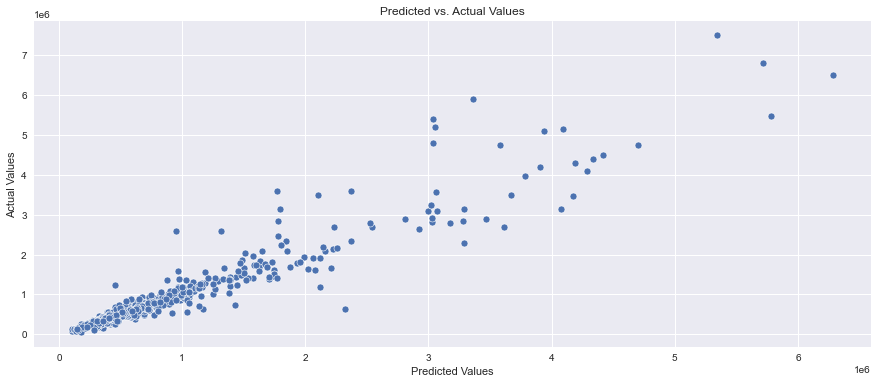

------------------------------------------------------------------------------------------------------------------------
KNeighborsRegressor()
R Squared (R2):  77.65874769809187
Mean Squared Error (MSE):  124865075842.8838
Root Mean Squared Error (RMSE):  353362.52750239917
Mean Absolute Error (MAE):  152638.39074675326


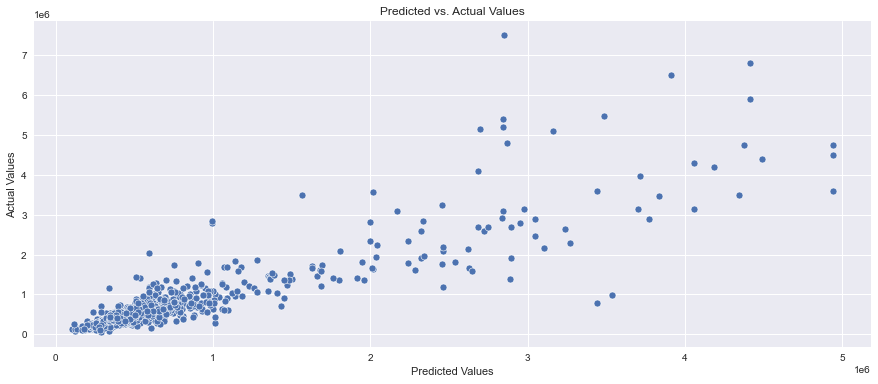

------------------------------------------------------------------------------------------------------------------------
GradientBoostingRegressor()
R Squared (R2):  90.47935061276328
Mean Squared Error (MSE):  53210831324.315865
Root Mean Squared Error (RMSE):  230674.73057167718
Mean Absolute Error (MAE):  114985.21170524851


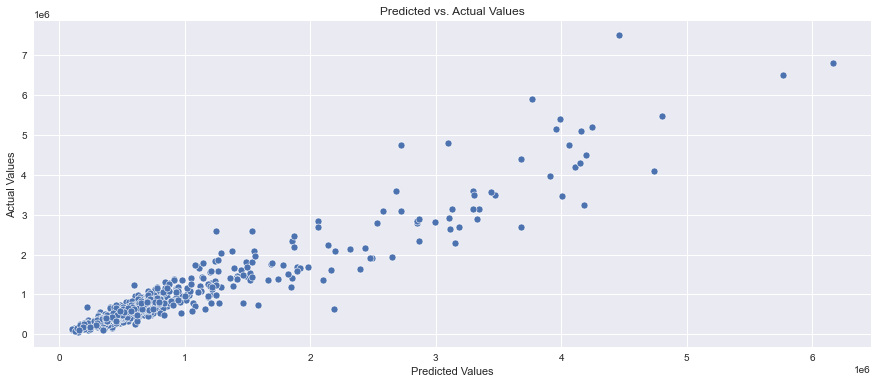

------------------------------------------------------------------------------------------------------------------------
DecisionTreeRegressor(max_features='auto')
R Squared (R2):  86.30676373052702
Mean Squared Error (MSE):  76531385180.06169
Root Mean Squared Error (RMSE):  276643.0645797246
Mean Absolute Error (MAE):  96755.43506493507


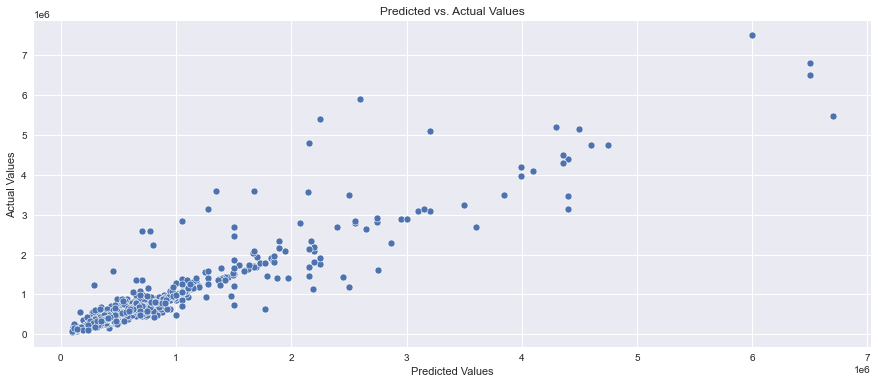

------------------------------------------------------------------------------------------------------------------------
Lasso()
R Squared (R2):  78.53383251107547
Mean Squared Error (MSE):  119974234001.72075
Root Mean Squared Error (RMSE):  346372.96950212604
Mean Absolute Error (MAE):  183979.71633021004


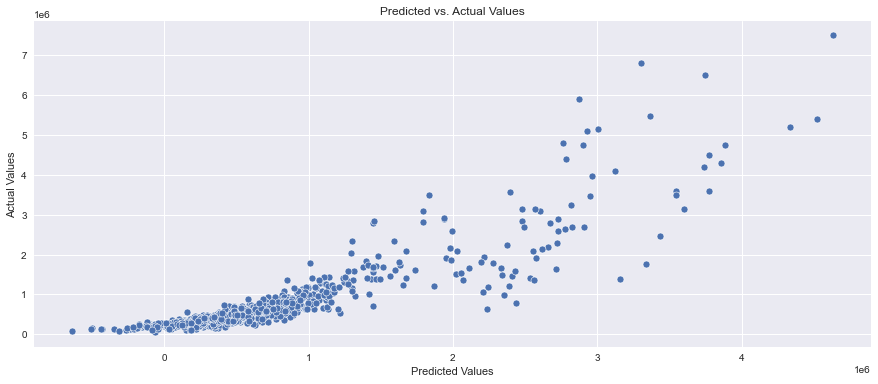

------------------------------------------------------------------------------------------------------------------------
Ridge()
R Squared (R2):  78.53290464518251
Mean Squared Error (MSE):  119979419836.58493
Root Mean Squared Error (RMSE):  346380.4553328391
Mean Absolute Error (MAE):  183970.279697627


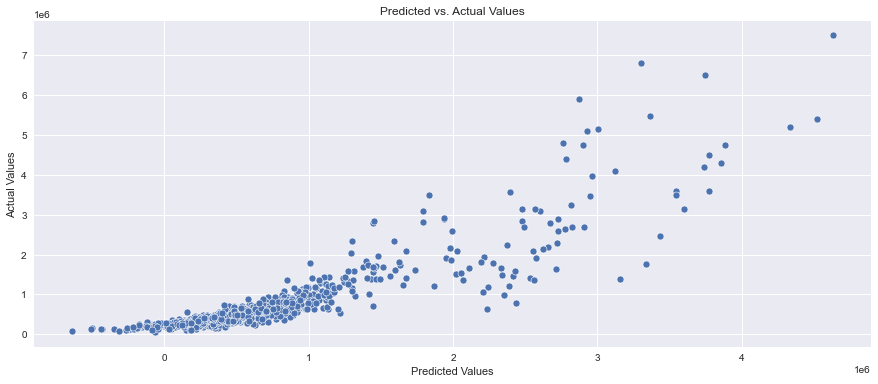

------------------------------------------------------------------------------------------------------------------------


In [150]:
rf=RandomForestRegressor()
kn=KNeighborsRegressor()
gb=GradientBoostingRegressor()
dt = DecisionTreeRegressor(max_features='auto')
ls=Lasso()
rd=Ridge()

model=[rf,kn,gb,dt,ls,rd]
kf = KFold(n_splits=5, random_state=43, shuffle=True)

train=[]
test=[]
cv=[]

for m in model:
    m = m.fit(x_train,y_train)
    pred_train=m.predict(x_train)
    pred_test=m.predict(x_test)
    train_score=r2_score(y_train,pred_train)
    train.append(train_score*100)
    test_score=r2_score(y_test,pred_test)
    test.append(test_score*100)
    print(m)
    print('R Squared (R2): ',test_score*100)
    print('Mean Squared Error (MSE): ',mean_squared_error(y_test,pred_test))
    print('Root Mean Squared Error (RMSE): ',np.sqrt(mean_squared_error(y_test, pred_test)))
    print('Mean Absolute Error (MAE): ',mean_absolute_error(y_test,pred_test))
    score=cross_val_score(m,X_scaled,Y,cv=kf)
    cv.append(score.mean()*100)
    plt.figure(figsize=[15,6])
    sns.scatterplot(x=pred_test, y=y_test)
    plt.xlabel('Predicted Values')
    plt.ylabel('Actual Values')
    plt.title('Predicted vs. Actual Values')
    plt.show()
    print('-'*120)
    
    
    
    
Overall_score={'Model':['RandomForest','KNN','GradientBoosting','DecisionTree Regressor','Lasso','Ridge'],
             'Training Score':train,
            'Test Score':test,
            'Cross Validation Score': cv}
Overall_score=pd.DataFrame(data=Overall_score)


Let's check for our Overall scores of our models:

In [151]:
Overall_score #display the table

,Model,Training Score,Test Score,Cross Validation Score
0,RandomForest,98.78516167,90.69261823,89.10247191
1,KNN,83.48265226,77.65874770,74.88136009
2,GradientBoosting,93.40261252,90.47935061,87.94187316
3,DecisionTree Regressor,99.99855838,86.30676373,80.23186179
4,Lasso,73.92046875,78.53383251,73.34839438
5,Ridge,73.92046686,78.53290465,73.34861818


In [152]:
#Let's get a new column, that shows the difference between Prediction Test R2 Score and Cross Validation Score

Overall_score['Difference'] = Overall_score['Test Score'] - Overall_score['Cross Validation Score']
Overall_score #display the table

,Model,Training Score,Test Score,Cross Validation Score,Difference
0,RandomForest,98.78516167,90.69261823,89.10247191,1.59014632
1,KNN,83.48265226,77.65874770,74.88136009,2.77738761
2,GradientBoosting,93.40261252,90.47935061,87.94187316,2.53747745
3,DecisionTree Regressor,99.99855838,86.30676373,80.23186179,6.07490194
4,Lasso,73.92046875,78.53383251,73.34839438,5.18543813
5,Ridge,73.92046686,78.53290465,73.34861818,5.18428647


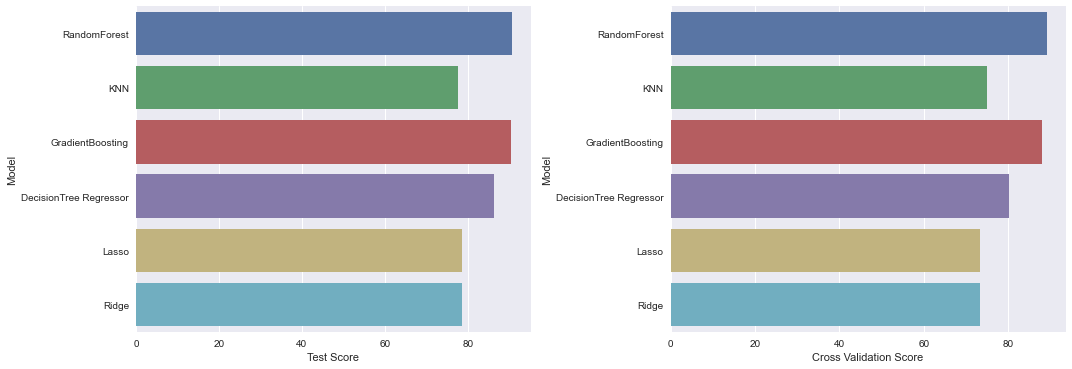

In [172]:
plt.figure(figsize=(15,15))

plt.subplot(3,2,1)
sns.barplot(x = 'Test Score', y = 'Model', data = Overall_score)

plt.subplot(3,2,2)
sns.barplot(x = 'Cross Validation Score', y = 'Model', data = Overall_score)
plt.tight_layout()
plt.show()

In [153]:
Overall_score['Difference'].min()  #Find the value with least difference in "Difference Column"

1.5901463211815638

In [154]:
#Let's check the row that has the least difference value in "Difference Column"

Overall_score[Overall_score['Difference']==1.5901463211815638]

,Model,Training Score,Test Score,Cross Validation Score,Difference
0,RandomForest,98.78516167,90.69261823,89.10247191,1.59014632


    "Random Forest Regressor" model comes up with "high R2_score" and with least difference between the R2 Score and          the Cross validation score
## "Random Forest Regressor" is our best model for "Used Car Price Prediction" with the accuracy score of 90.7%

Let's Hyper tune our model to increase the accuracy score


### Hypertuning the model

In [174]:
from sklearn.model_selection import GridSearchCV

#parameters
param_grid = {'n_estimators':[50,100],
             'max_features':['auto','sqrt'],
             'max_depth':[4,5,None],'min_samples_split' : [2, 5, 10],
             'criterion':['squared_error','mse'],'min_samples_leaf': [1, 2, 3]}   

gridsearch=GridSearchCV(estimator = rf, param_grid = param_grid,cv=5)     

gridsearch.fit(x_train,y_train) #training the model

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'criterion': ['squared_error', 'mse'],
                         'max_depth': [4, 5, None],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100]})

In [175]:
print(gridsearch.best_score_, gridsearch.best_params_)  #finding the best parameters

0.8972633283725265 {'criterion': 'mse', 'max_depth': None, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


In [179]:
Rand_Final = RandomForestRegressor(n_estimators=100,max_features='auto',max_depth=None,criterion='mse',
                                   min_samples_split=2,min_samples_leaf=1)

Rand_Final.fit(x_train,y_train)  #training the model
predictions = Rand_Final.predict(x_test)  #predicting

### Performance Metrics of the model
Let's check the model performance

In [180]:
print('R Squared (R2): ',r2_score(y_test,predictions))
print('Mean Squared Error (MSE): ',mean_squared_error(y_test,predictions))
print('Root Mean Squared Error (RMSE): ',np.sqrt(mean_squared_error(y_test, predictions)))
print('Mean Absolute Error (MAE): ',mean_absolute_error(y_test,predictions))

R Squared (R2):  0.9082564822524792
Mean Squared Error (MSE):  51275376808.92997
Root Mean Squared Error (RMSE):  226440.66951175084
Mean Absolute Error (MAE):  83110.16246043987


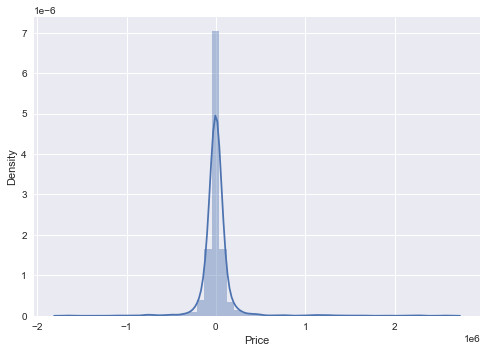

In [184]:
#Let's again plot the difference between the y_test price and our model predicted price

sns.distplot(y_test-predictions)
plt.show()

- We could now see there is a slight change and now we have most data with zero difference

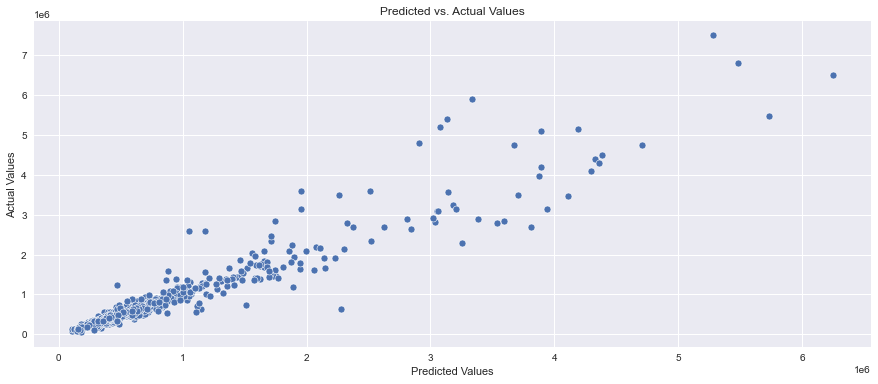

In [185]:
#plot predicted vs. actual values

plt.figure(figsize=[15,6])
sns.scatterplot(x=predictions, y=y_test)
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Predicted vs. Actual Values')
plt.show()

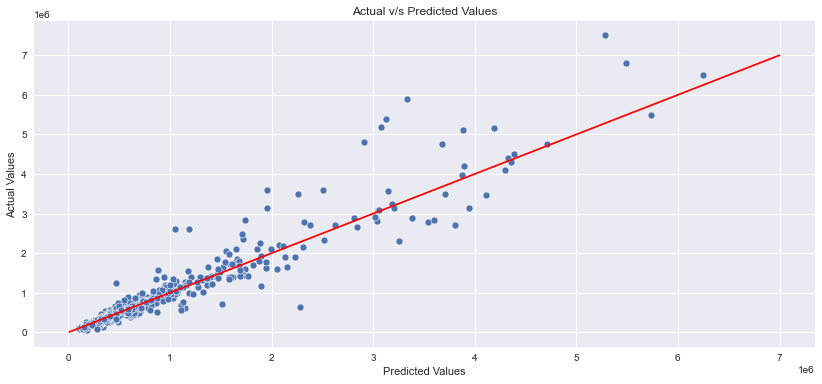

In [204]:
# plot LOO predictions against actual
plt.figure(figsize=[14,6])

plot_LOO = sns.scatterplot(predictions,y_test)
plot_LOO.set(xlabel='Predicted Values', ylabel='Actual Values')
# generate and graph y = x line
x_plot = np.linspace(10000,7000000)
y_plot = x_plot

plt.plot(x_plot, y_plot, color='r')
plt.title("Actual v/s Predicted Values")
plt.show()


    The above graph indicates that most of the "Actual and Predicted" values are quite close to each other
#### After hyper tuning , Our model score is now increased by 0.00133029998% of acuracy score
## Hence, our model is ready with 90.83 % of Acuracy Score

----------


### Saving the model for future prediction:


In [183]:
#Let's save our model for future predictions

import joblib

joblib.dump(Rand_final,'Used_Car_Price_Prediction.obj')

['Used_Car_Price_Prediction.obj']

### Loading the saved model to predict the Used_Car_Price

In [196]:
#Load the saved model

loaded_model = joblib.load(open('Used_Car_Price_Prediction.obj','rb'))

In [197]:
# Predict the Labels using the reloaded Model
Predictions = loaded_model.predict(x_test)

Predictions

array([439616.29780208, 306203.08155818, 398503.68258777, ...,
       623758.80099066, 583180.03714536, 812343.2194945 ])

In [199]:
#create dataframe of actual and predicted values

list_of_tuples = list(zip(y_test, Predictions))
Used_Car_Price = pd.DataFrame(list_of_tuples, columns = ['Actual', 'Predicted'])

In [202]:
pd.set_option ('display.max_rows', None)


Used_Car_Price

,Actual,Predicted
0,484999,439616.29780208
1,325000,306203.08155818
2,447500,398503.68258777
3,395000,458664.31838474
4,235500,256362.16411562
5,416500,429487.59049075
6,529500,603160.83003005
7,795000,784268.23706957
8,550000,589925.40717900
9,414000,467802.86801625


In [227]:
#Saving the dataframe of the actual v/s predicted values as a csv file

Used_Car_Price.to_csv('Predicted_car_Prices.csv')

---------------